# Análise de preço de carros - Tabela FIPE Brasil
# Aluno: Ricardo Mello

Turma: Dados 2024.2



In [4]:
#Opção de carregar arquivos direto do Google Drive

#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Informações do Dataset

Detalhes sobre preço de carros usados no Brasil de acordo com a Tabela FIPE dos anos de 2021,2022 e 2023

Colunas do Dataset:

- Year_of_reference: Ano de referência para cálculo do preço
- Month_of_reference: Mês de referência para cálculo do preço
- Fipe_code: Código da Tabela FIPE (Preços médios de veículos anunciados pelos vendedores, no mercado nacional - pesquisados pela Fundação Instituto de Pesquisas Econômicas)
- authentication: Código único do veículo
- Brand: Marca do veículo
- Model: Modelo/Versão do veículo
- Fuel: Tipo de combustível (Gasolina, Alcool ou Diesel)
- Gear: Tipo de transmissão (Manual ou Automática)
- Engine_size: Cilindradas do motor
- Year_model: Ano de fabricação do veículo
- Avg_price_brl: Preço médio de venda em R$


In [6]:
#importar os dados do arquivo no Github para o DataFrame

df = pd.read_csv('https://raw.githubusercontent.com/RicardoMello92/Pandas_Pre-os_Carros/refs/heads/main/precos_carros_brasil.csv')
df.head()

<ipython-input-6-d5d01f458dcf>:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/RicardoMello92/Pandas_Pre-os_Carros/refs/heads/main/precos_carros_brasil.csv')


,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


# Removendo linhas em Branco

In [7]:
#Informações gerais do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267542 entries, 0 to 267541
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   202297 non-null  float64
 1   month_of_reference  202297 non-null  object 
 2   fipe_code           202297 non-null  object 
 3   authentication      202297 non-null  object 
 4   brand               202297 non-null  object 
 5   model               202297 non-null  object 
 6   fuel                202297 non-null  object 
 7   gear                202297 non-null  object 
 8   engine_size         202297 non-null  object 
 9   year_model          202297 non-null  float64
 10  avg_price_brl       202297 non-null  float64
dtypes: float64(3), object(8)
memory usage: 22.5+ MB


In [8]:
df.isnull().sum()

,0
year_of_reference,65245
month_of_reference,65245
fipe_code,65245
authentication,65245
brand,65245
model,65245
fuel,65245
gear,65245
engine_size,65245
year_model,65245


Existem 65245 linhas em branco. Essas linhas serão deletadas do DataFrame

In [9]:
#Deletar linhas em branco
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202297 entries, 0 to 202296
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   202297 non-null  float64
 1   month_of_reference  202297 non-null  object 
 2   fipe_code           202297 non-null  object 
 3   authentication      202297 non-null  object 
 4   brand               202297 non-null  object 
 5   model               202297 non-null  object 
 6   fuel                202297 non-null  object 
 7   gear                202297 non-null  object 
 8   engine_size         202297 non-null  object 
 9   year_model          202297 non-null  float64
 10  avg_price_brl       202297 non-null  float64
dtypes: float64(3), object(8)
memory usage: 18.5+ MB


In [10]:
# Criar coluna numérica de month_number para análises temporais


def month(x):
  match x:
    case 'January':
      return 1
    case 'February':
      return 2
    case 'March':
      return 3
    case 'April':
      return 4
    case 'May':
      return 5
    case 'June':
      return 6
    case 'July':
      return 7
    case 'August':
      return 8
    case 'September':
      return 9
    case 'October':
      return 10
    case 'November':
      return 11
    case 'December':
      return 12

df['month_number']=df['month_of_reference'].apply(month)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202297 entries, 0 to 202296
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   202297 non-null  float64
 1   month_of_reference  202297 non-null  object 
 2   fipe_code           202297 non-null  object 
 3   authentication      202297 non-null  object 
 4   brand               202297 non-null  object 
 5   model               202297 non-null  object 
 6   fuel                202297 non-null  object 
 7   gear                202297 non-null  object 
 8   engine_size         202297 non-null  object 
 9   year_model          202297 non-null  float64
 10  avg_price_brl       202297 non-null  float64
 11  month_number        202297 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 20.1+ MB


202297 linhas sem valores nulos

# Análise de Duplicatas

In [12]:
#Verificar se existem valores duplicados
df.duplicated().sum()

2

In [13]:
#Verificar as linhas duplicadas
df[df.duplicated()]

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,month_number
45793,2021.0,June,025232-8,5rtdwkpkpq5h,Renault,DUSTER OROCH Dyna. 2.0 Flex 16V Mec.,Gasoline,manual,2,2018.0,69893.0,6
189896,2022.0,December,003296-4,3r6c277cnqcb,Ford,Ranger Limited 3.0 PSE 4x4 CD TB Diesel,Diesel,manual,3,2007.0,64638.0,12


In [14]:
#Listar as linhas duplicadas
df[(df['authentication']=='5rtdwkpkpq5h')|(df['authentication']=='3r6c277cnqcb')]

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,month_number
45791,2021.0,June,025232-8,5rtdwkpkpq5h,Renault,DUSTER OROCH Dyna. 2.0 Flex 16V Mec.,Gasoline,manual,2,2018.0,69893.0,6
45793,2021.0,June,025232-8,5rtdwkpkpq5h,Renault,DUSTER OROCH Dyna. 2.0 Flex 16V Mec.,Gasoline,manual,2,2018.0,69893.0,6
189895,2022.0,December,003296-4,3r6c277cnqcb,Ford,Ranger Limited 3.0 PSE 4x4 CD TB Diesel,Diesel,manual,3,2007.0,64638.0,12
189896,2022.0,December,003296-4,3r6c277cnqcb,Ford,Ranger Limited 3.0 PSE 4x4 CD TB Diesel,Diesel,manual,3,2007.0,64638.0,12


In [15]:
#Excluir as linhas duplicadas
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202295 entries, 0 to 202296
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   202295 non-null  float64
 1   month_of_reference  202295 non-null  object 
 2   fipe_code           202295 non-null  object 
 3   authentication      202295 non-null  object 
 4   brand               202295 non-null  object 
 5   model               202295 non-null  object 
 6   fuel                202295 non-null  object 
 7   gear                202295 non-null  object 
 8   engine_size         202295 non-null  object 
 9   year_model          202295 non-null  float64
 10  avg_price_brl       202295 non-null  float64
 11  month_number        202295 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 20.1+ MB


In [16]:
df.duplicated().sum()

0

Após limpeza e tratamento inicial dos dados, o DataFrame contém 11 colunas e 202295 linhas sem linhas duplicadas e valores nulos.

Foi criada uma nova coluna month_number para permitir ordenação ao longo do tempo.

# Análise descritiva


In [17]:
#Análise das colunas numéricas
df.describe()

,year_of_reference,year_model,avg_price_brl,month_number
count,202295.000000,202295.000000,202295.000000,202295.000000
mean,2021.564695,2011.271514,52756.765713,6.295811
std,0.571904,6.376241,51628.912116,3.552728
min,2021.000000,2000.000000,6647.000000,1.000000
25%,2021.000000,2006.000000,22855.000000,3.000000
50%,2022.000000,2012.000000,38027.000000,6.000000
75%,2022.000000,2016.000000,64064.000000,9.000000
max,2023.000000,2023.000000,979358.000000,12.000000


In [18]:
#Análise das colunas categóricas
df.describe(include='O')

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202295,202295,202295,202295,202295,202295,202295,202295
unique,12,2091,202295,6,2112,3,2,29
top,January,003281-6,cfzlctzfwrcp,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,1,44962,425,168684,161883,47420


- Ano de fabricação dos veículos varia de 2000 até 2023 com preço médio de 52756 reais e valores de preço entre 6.647 e 979.358 reais.
- 6 Marcas de carro sendo FIAT a mais comum (22,2%).
- 3 Tipos de combustível sendo gasolina o combustível mais comum (83,3%).
- 2 Tipos de transmissão sendo manual a mais comum (80%).
- Motor mais comum é 1.6cc
- Modelo mais comum é o Palio Week. Adv/Adv TRYON 1.8 mpi Flex

In [19]:
#Listagem das seis marcas presentes
df['brand'].unique()

array(['GM - Chevrolet', 'Fiat', 'Ford', 'Nissan', 'Renault',
       'VW - VolksWagen'], dtype=object)

In [20]:
#Listagem dos diferentes tamanhos de motores
df['engine_size'].unique()

array(['1', '1,6', '2,2', '4,3', '2,5', '1,8', '2', '4,2', '3,8', '4,1',
       '5,7', '2,8', '2,4', '1,4', '3,6', '6,2', '3', '1,2', '1,5', '1,3',
       '1,9', '2,3', '4', '3,9', '5', '3,5', '3,2', '2,7', '3,3'],
      dtype=object)

# Análises realizadas:
- Distribuição da quantidade de carros por marca.
- Distribuição da quantidade de carros por tipo de Transmissão.
- Análise Temporal dos preços em 2022
- Análise temporal dos preços entre 2021 e 2023
- Distribuição da média de preço dos carros por marca e tipo de transmissão.
- Distribuição da média de preço dos carros por marca e tipo de combustível.
- Distribuição da quantidade de carros por Tipo de Combustível
- Preço médio por Marca
- Preço Médio por tipo de transmissão
- Preço médio por Tipo de Combustível
- Preço médio por tamanho do motor
- Evolução do Preço médio dos carros por marca ao longo dos anos
- Análise temporal do preço por tipo de combustível
- Quantidade de carros por ano de fabricação e tipo de combustível
- Evolução do Preço médio dos carros por tipo de transmissão ao longo dos anos
- Evolução do Preço médio por Data de Fabricação e Marca
- 5 modelos mais caros e mais baratos listados por Marca
- Conclusões Finais


# Distribuição da quantidade de carros por Marca

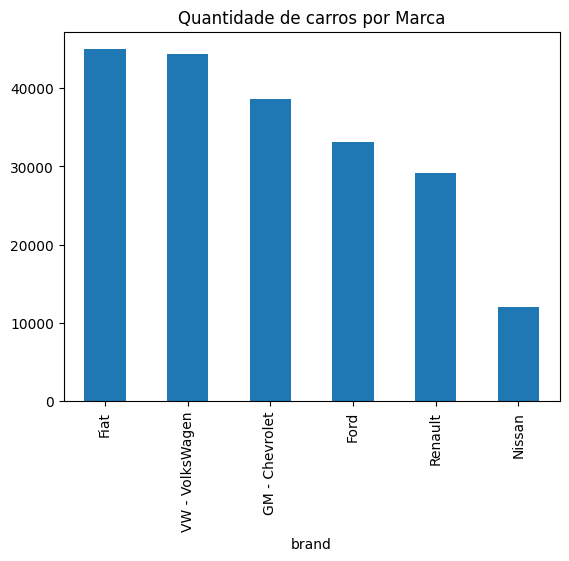

In [21]:
#Quantidade de carros por Marca

x=df['brand'].value_counts().plot(kind='bar', title='Quantidade de carros por Marca')


Text(0.5, 1.0, 'Quantidade de carros por Marca')

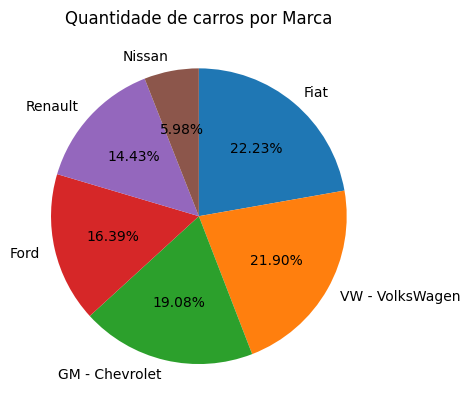

In [22]:
#Gráfico de pizza para distribuição dos carros por Marca

plt.pie(x=df['brand'].value_counts(),
        labels=df['brand'].value_counts().index,
        autopct='%.2f%%',
        startangle=90,
        counterclock=False)

plt.title('Quantidade de carros por Marca')



Marca com maior quantidade de carros listados é a Fiat (22,23%) e a Nissan possui a menor quantidade (5,98%).

# Distribuição da quantidade de carros por Tipo de Transmisssão/Engrenagem

Text(0.5, 1.0, 'Quantidade de carros por tipo de Transmissão')

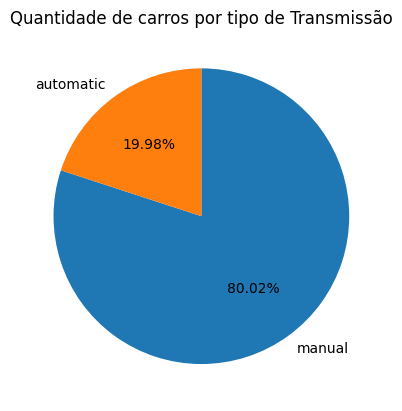

In [23]:
#Gráfico de pizza para distribuição dos carros por tipo de transmissão
plt.pie(x=df['gear'].value_counts(),
        labels=df['gear'].value_counts().index,
        autopct='%.2f%%',
        startangle=90,
        counterclock=False)

plt.title('Quantidade de carros por tipo de Transmissão')

Ampla maioria dos carros listados são manuais (80%).

# Análise temporal dos preços

,year_of_reference,month_number,avg_price_brl
month_of_reference,,,
January,2022.0,1.0,54840.0
February,2022.0,2.0,55825.0
March,2022.0,3.0,56849.0
April,2022.0,4.0,57150.0
May,2022.0,5.0,57800.0
June,2022.0,6.0,58066.0
July,2022.0,7.0,57894.0
August,2022.0,8.0,57924.0
September,2022.0,9.0,58199.0


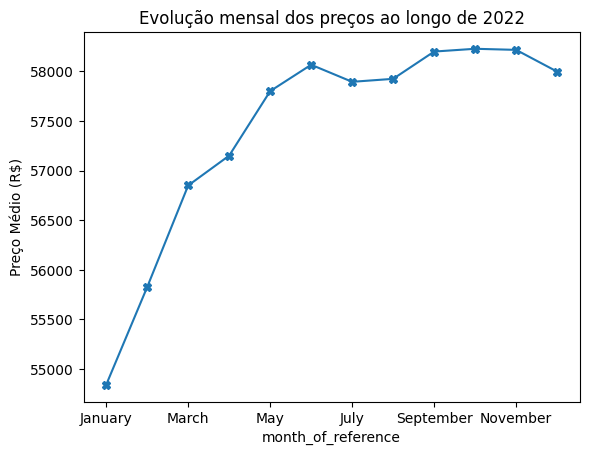

In [24]:
# Evolução mensal dos preços durante o ano de 2022
df_2022 = df[df['year_of_reference']==2022][['year_of_reference','month_of_reference','month_number','avg_price_brl']].groupby(by='month_of_reference').mean().round().sort_values(by='month_number')



df_2022['avg_price_brl'].plot(kind='line', marker='X')
plt.title('Evolução mensal dos preços ao longo de 2022')
plt.ylabel('Preço Médio (R$)')
df_2022



Preço médio dos carros aumentou nos primeiros 5 meses em 2022 e em seguida se manteve relativamente estável ao longo de 2022. Janeiro foi o mês com o preço mais baixo (54840 reais) e Outubro o maior preço (58227 reais).

In [25]:
df[['year_of_reference','month_of_reference','month_number','avg_price_brl']].groupby(['year_of_reference','month_of_reference']).mean('avg_price_brl').sort_values(by=['year_of_reference','month_number'])

month_number  avg_price_brl
year_of_reference month_of_reference                             
2021.0            January                      1.0   42160.337410
                  February                     2.0   42410.941896
                  March                        3.0   43147.314638
                  April                        4.0   44451.234032
                  May                          5.0   45074.421574
                  June                         6.0   46882.325402
                  July                         7.0   48163.239409
                  August                       8.0   49362.521125
                  September                    9.0   50554.298550
                  October                     10.0   51532.005441
                  November                    11.0   52688.565663
                  December                    12.0   53673.729953
2022.0            January                      1.0   54840.270037
                  February                     2.0   55824.519882
                  March                        3.0   56848.951914
                  April                        4.0   57150.037325
                  May                          5.0   57799.763776
                  June                         6.0   58065.611398
                  July                         7.0   57893.997056
                  August                       8.0   57923.544105
                  September                    9.0   58198.936989
                  October                     10.0   58227.410144
                  November                    11.0   58215.626236
                  December                    12.0   57997.243992
2023.0            January                      1.0   58412.392870

(0.0, 60000.0)

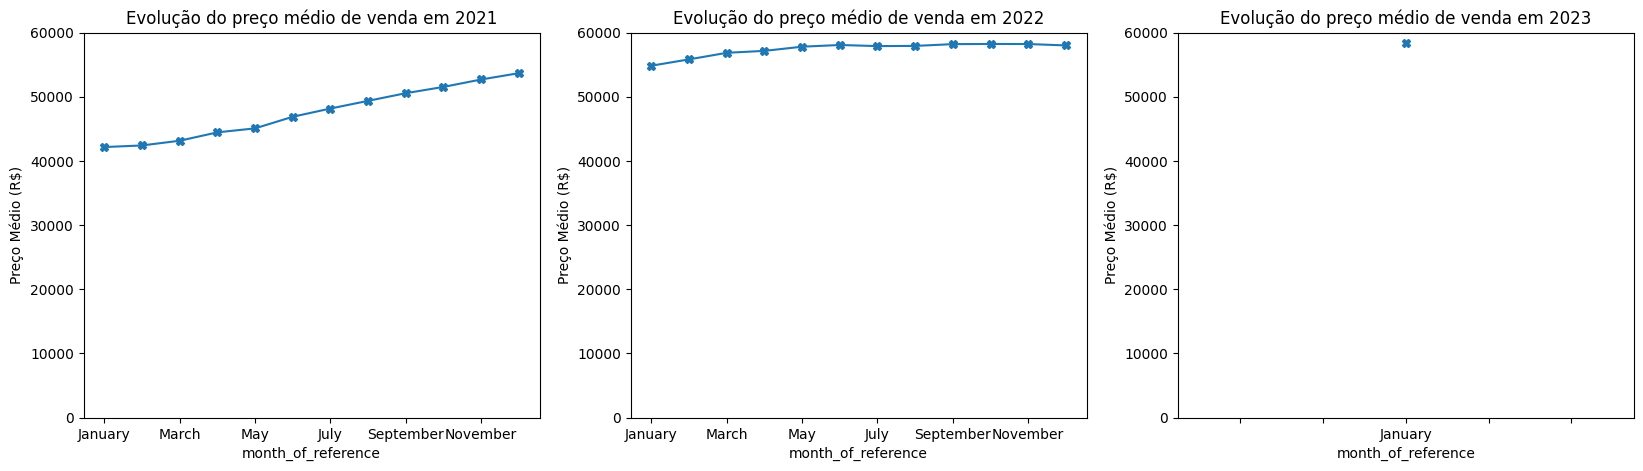

In [26]:
#Evolução mensal ao longo dos 3 anos em análise

fig, ax = plt.subplots(1,3, figsize=(20,5))

df_2021 = df[df['year_of_reference']==2021][['year_of_reference','month_of_reference','month_number','avg_price_brl']].groupby(by='month_of_reference').mean().round().sort_values(by='month_number')

df_2021['avg_price_brl'].plot(kind='line', ax=ax[0], marker='X')

ax[0].set_title('Evolução do preço médio de venda em 2021')

ax[0].set_ylim(0,60000)
ax[0].set_ylabel('Preço Médio (R$)')


df_2022 = df[df['year_of_reference']==2022][['year_of_reference','month_of_reference','month_number','avg_price_brl']].groupby(by='month_of_reference').mean().round().sort_values(by='month_number')

df_2022['avg_price_brl'].plot(kind='line', ax=ax[1], marker='X')

ax[1].set_title('Evolução do preço médio de venda em 2022')
ax[1].set_ylabel('Preço Médio (R$)')
ax[1].set_ylim(0,60000)

df_2023 = df[df['year_of_reference']==2023][['year_of_reference','month_of_reference','month_number','avg_price_brl']].groupby(by='month_of_reference').mean().round().sort_values(by='month_number')

df_2023['avg_price_brl'].plot(kind='line', ax=ax[2], marker='X')

ax[2].set_title('Evolução do preço médio de venda em 2023')


ax[2].set_ylabel('Preço Médio (R$)')
ax[2].set_ylim(0,60000)





Houve grande aumento de preço médio ao longo de 2021 (crescimento em todos os meses), em 2022 os preços aumentaram nos 5 primeiros meses e após isso a situação se estabilizou.
Preço em 2023 em patamar similar ao final de 2022.

Preço médio aumentou 38% entre Janeiro de 2021 e Janeiro de 2023.

# Preço por Marca e Tipo de Transmissão / Engrenagem

In [27]:
#Distribuição da média de preço dos carros por marca e tipo de transmissão.
df[['brand','gear','avg_price_brl']].groupby(['brand','gear']).mean().round(2)

avg_price_brl
brand           gear                    
Fiat            automatic       97396.80
                manual          39694.44
Ford            automatic       84769.11
                manual          51784.33
GM - Chevrolet  automatic       88156.92
                manual          52119.42
Nissan          automatic       94230.60
                manual          52680.62
Renault         automatic       44028.01
                manual          47648.80
VW - VolksWagen automatic       99734.98
                manual          40390.33

Text(0, 0.5, 'Preço Médio (R$)')

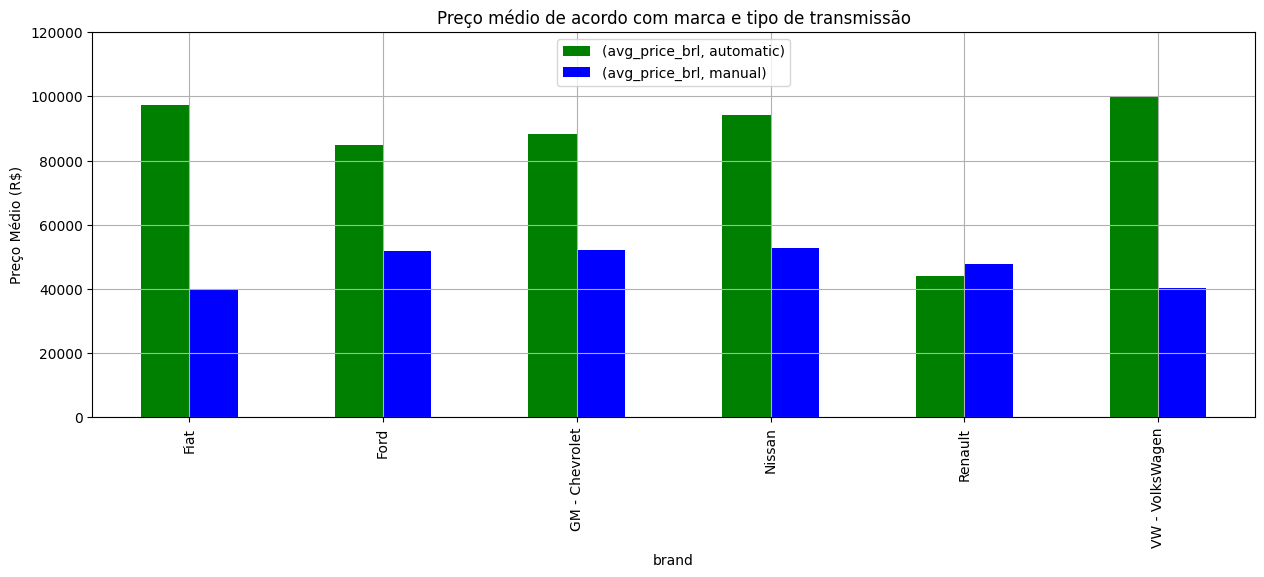

In [28]:
#Distribuição da média de preço dos carros por marca e tipo de transmissão.
df[['brand','gear','avg_price_brl']].groupby(['brand','gear']).mean().unstack().plot(kind='bar', legend=True, color=[ 'g', 'b'], title='Preço médio de acordo com marca e tipo de transmissão',grid=True,figsize=(15,5), ylim=(0,120000))
plt.legend(loc='upper center')
plt.ylabel('Preço Médio (R$)')

Preços médios dos carros automáticos são mais caros em todas as marcas com exceção da Renault.

VW possui o maior preço médio de carros automáticos e Ford o menor preço médio.

Nissan possui o maior preço médio de carros manuais e Fiat o menor preço médio

# Preço por marca e tipo de combustível

In [29]:
#Distribuição da média de preço dos carros por marca e tipo de combustível.


df[['brand','fuel','avg_price_brl']].groupby(['brand','fuel']).mean().round(2)

avg_price_brl
brand           fuel                   
Fiat            Alcohol        11509.51
                Diesel         99814.45
                Gasoline       37197.29
Ford            Alcohol        10148.91
                Diesel         94525.53
                Gasoline       45844.52
GM - Chevrolet  Alcohol        13697.72
                Diesel         99817.32
                Gasoline       56497.13
Nissan          Diesel         95534.07
                Gasoline       59043.29
Renault         Diesel        104529.93
                Gasoline       37058.01
VW - VolksWagen Alcohol        13392.68
                Diesel        139216.28
                Gasoline       44653.80

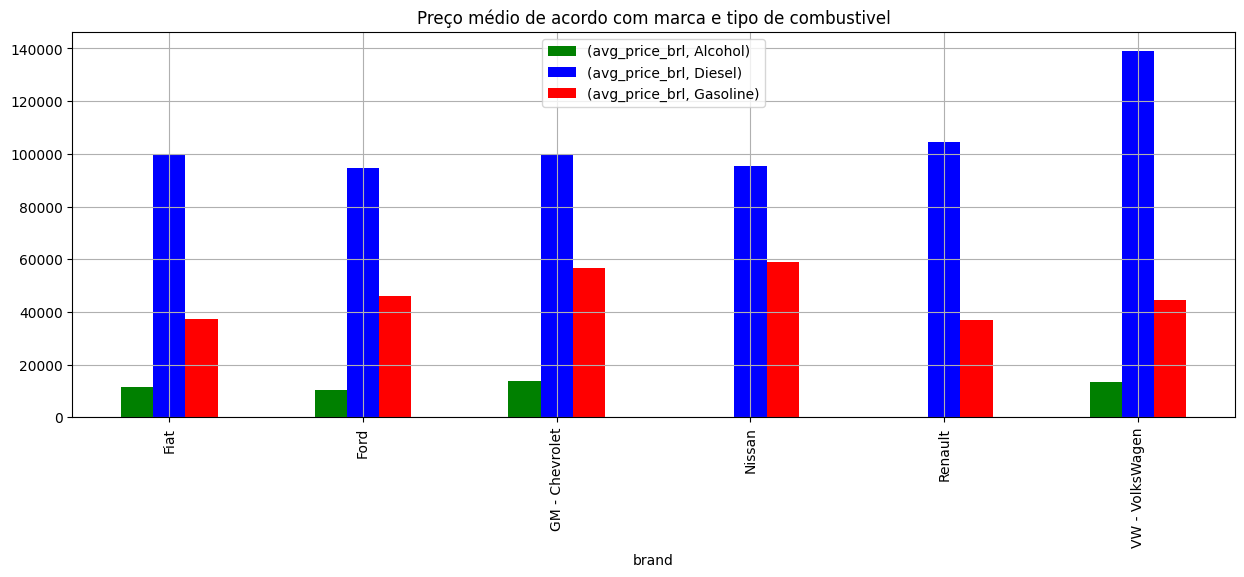

In [30]:
#Distribuição da média de preço dos carros por marca e tipo de combustível.
df[['brand','fuel','avg_price_brl']].groupby(['brand','fuel']).mean().unstack().plot(kind='bar', legend=True, color=[ 'g', 'b' , 'r'], title='Preço médio de acordo com marca e tipo de combustivel',grid=True,figsize=(15,5))
plt.legend(loc='upper center')


Carros a diesel são mais caros em todas as marcas onde os carros da Volkswagen são os mais caros e os da Ford são os mais baratos.

Carros a gasolina mais caros são da marca Nissan e os mais baratos da marca  Renault.

# Distribuição da quantidade de carros por Tipo de Combustível

Text(0.5, 1.0, 'Quantidade de carros por tipo de Combustível')

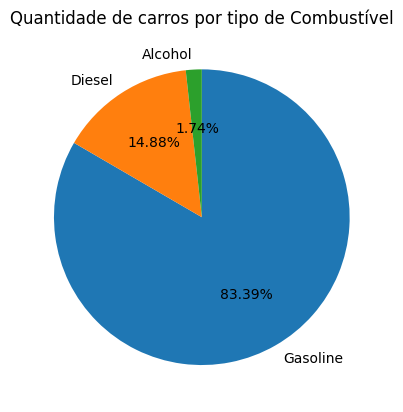

In [31]:
#Gráfico de pizza para distribuição dos carros por tipo de combustível
plt.pie(x=df['fuel'].value_counts(),
        labels=df['fuel'].value_counts().index,
        autopct='%.2f%%',
        startangle=90,
        counterclock=False)

plt.title('Quantidade de carros por tipo de Combustível')

Ampla maioria dos carros listados são à gasolina (83,39%) e a minoria são à  Alcool (1,74%).

# Preço médio por Marca

In [32]:
#Função de agregação para calcular o preço médio por Marca
df[['brand','avg_price_brl']].groupby('brand').mean().round(2).sort_values('avg_price_brl', ascending=False)

,avg_price_brl
brand,
Nissan,69761.14
GM - Chevrolet,62169.58
Ford,60017.10
VW - VolksWagen,47981.17
Renault,46675.72
Fiat,43407.20


<Axes: title={'center': 'Preço médio por marca'}, xlabel='brand'>

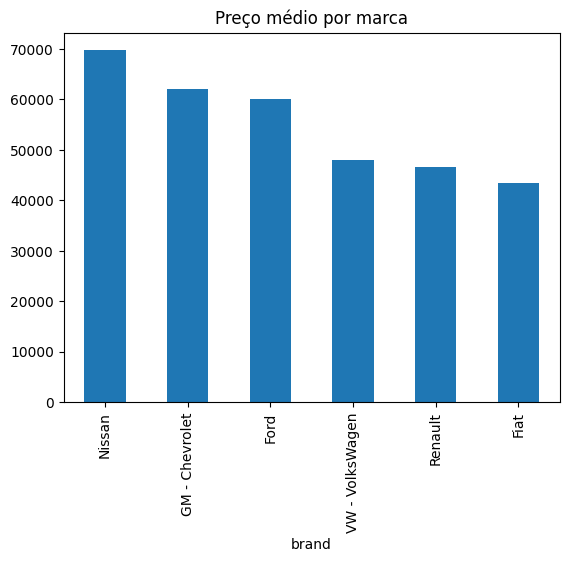

In [33]:
#Gráfico de barras para visualizar o comparativo dos preços
df[['brand','avg_price_brl']].groupby('brand').mean().round(2).sort_values('avg_price_brl',ascending=False).plot(kind='bar', title='Preço médio por marca', legend=False)

Nissan é a marca com o maior preço médio e Fiat é a marca com o menor preço médio

# Preço médio por Tipo de Transmissão

In [34]:
#Função de agregação para calcular o preço médio por Tipo de Transmissão
df[['gear','avg_price_brl']].groupby('gear').mean().round(2).sort_values('avg_price_brl',ascending=False)

,avg_price_brl
gear,
automatic,81929.05
manual,45474.28


<Axes: title={'center': 'Preço médio por Tipo de Transmissão'}, xlabel='gear'>

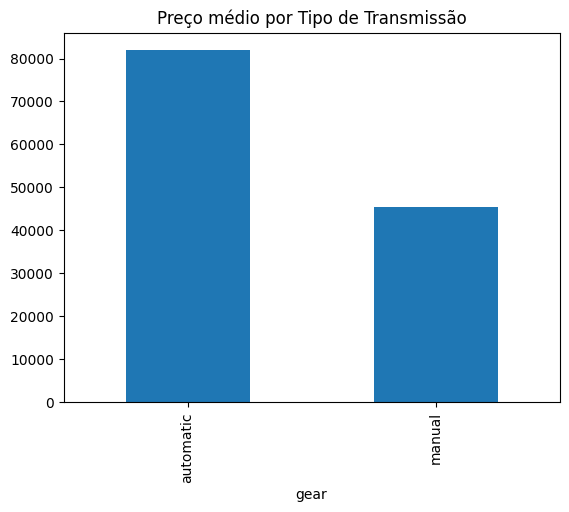

In [35]:
#Gráfico de barras para visualizar o comparativo dos preços

df[['gear','avg_price_brl']].groupby('gear').mean().round(2).sort_values('avg_price_brl',ascending=False).plot(kind='bar', title='Preço médio por Tipo de Transmissão', legend=False)

Carros automáticos são os mais caros. Preço médio 80% maior do que os carros manuais.

# Preço médio por Tipo de Combustível

In [36]:
#Função de agregação para calcular o preço médio por Tipo de Combustível
df[['fuel','avg_price_brl']].groupby('fuel').mean().round(2).sort_values('avg_price_brl',ascending=False)

,avg_price_brl
fuel,
Diesel,101065.69
Gasoline,44969.26
Alcohol,12798.23


<Axes: title={'center': 'Preço médio por Tipo de combustível'}, xlabel='fuel'>

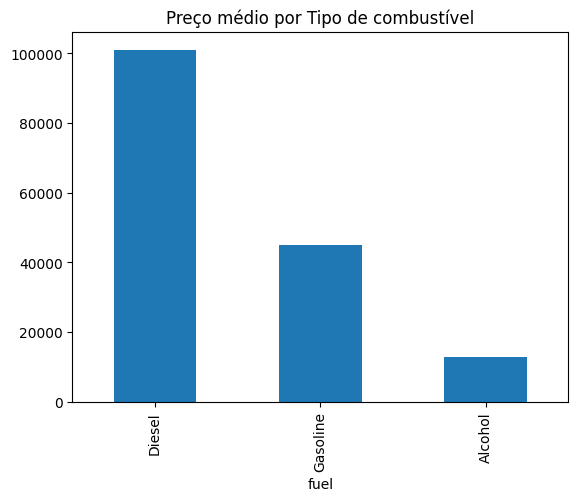

In [37]:
#Visualização do comparativo dos preços
df[['fuel','avg_price_brl']].groupby('fuel').mean().round(2).sort_values('avg_price_brl',ascending=False).plot(kind='bar', title='Preço médio por Tipo de combustível', legend=False)

Carros à diesel são os mais caros. Em média 124% mais caros do que carros à Gasolina.

# Preço médio por tamanho do motor

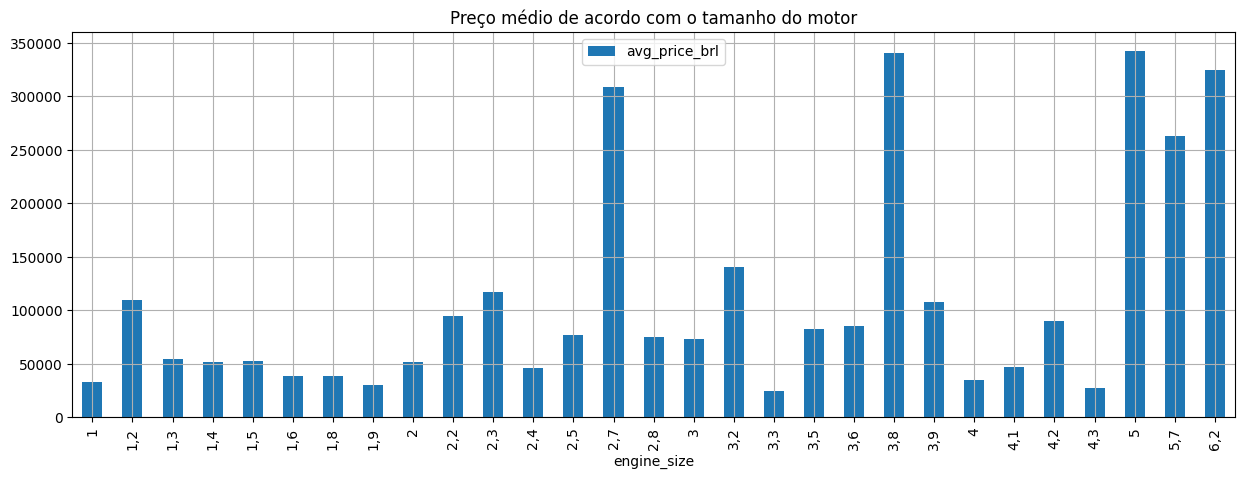

In [38]:
#Distribuição da média de preço dos carros por tamanho do motor.
df[['engine_size','avg_price_brl']].groupby('engine_size').mean().plot(kind='bar', legend=True, title='Preço médio de acordo com o tamanho do motor',grid=True,figsize=(15,5))
plt.legend(loc='upper center')

In [39]:
df[df['engine_size']=='2,7'].head()


,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,month_number
4558,2021.0,January,003469-0,qm0mb8q45yp,Ford,EDGE ST 2.7 V6 24V AWD Aut.,Gasoline,automatic,"2,7",2021.0,325537.0,1
4559,2021.0,January,003469-0,n86942v818dd6,Ford,EDGE ST 2.7 V6 24V AWD Aut.,Gasoline,automatic,"2,7",2020.0,289900.0,1
4560,2021.0,January,003469-0,njsjj4xmfrc9z,Ford,EDGE ST 2.7 V6 24V AWD Aut.,Gasoline,automatic,"2,7",2019.0,269904.0,1
12490,2021.0,February,003469-0,qhv6jmk3njp,Ford,EDGE ST 2.7 V6 24V AWD Aut.,Gasoline,automatic,"2,7",2021.0,322004.0,2
12491,2021.0,February,003469-0,phsfgsp2cgdd6,Ford,EDGE ST 2.7 V6 24V AWD Aut.,Gasoline,automatic,"2,7",2020.0,295488.0,2


In [40]:
df[df['engine_size']=='2,7']['model'].unique()

array(['EDGE ST 2.7 V6 24V AWD Aut.'], dtype=object)

In [41]:
df[df['engine_size']=='3,8']

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,month_number
67,2021.0,January,004090-8,mh7cqdq107rl,GM - Chevrolet,Omega CD 3.8 V6,Gasoline,manual,"3,8",2004.0,24299.0,1
68,2021.0,January,004090-8,lpckg3y38fnc,GM - Chevrolet,Omega CD 3.8 V6,Gasoline,manual,"3,8",2003.0,22093.0,1
69,2021.0,January,004090-8,kkt4jbg3yfj4,GM - Chevrolet,Omega CD 3.8 V6,Gasoline,manual,"3,8",2002.0,19148.0,1
70,2021.0,January,004090-8,kbwy320k2yfx,GM - Chevrolet,Omega CD 3.8 V6,Gasoline,manual,"3,8",2001.0,18556.0,1
71,2021.0,January,004090-8,jxl4zmdps6p,GM - Chevrolet,Omega CD 3.8 V6,Gasoline,manual,"3,8",2000.0,17423.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
194148,2023.0,January,004090-8,mkdqsy48b2fx,GM - Chevrolet,Omega CD 3.8 V6,Gasoline,manual,"3,8",2001.0,24399.0,1
194149,2023.0,January,004090-8,l9l0v7mv8tp,GM - Chevrolet,Omega CD 3.8 V6,Gasoline,manual,"3,8",2000.0,23734.0,1
199215,2023.0,January,023151-7,ch4c0vq3hthc9z,Nissan,GT-R 3.8 V6 BiTurbo Aut.,Gasoline,automatic,"3,8",2019.0,973195.0,1
199216,2023.0,January,023151-7,cgcmyhlvqwxc3j,Nissan,GT-R 3.8 V6 BiTurbo Aut.,Gasoline,automatic,"3,8",2017.0,926504.0,1


In [42]:
df[df['engine_size']=='3,8']['model'].unique()

array(['Omega CD 3.8 V6', 'GT-R 3.8 V6 BiTurbo Aut.'], dtype=object)

Carros com motores acima de 5000 cilindradas são muito mais caros do que os demais. Preço médio dos carros com motores de 2700cc e 3800c se destacam muito acima dos demais carros com motores abaixo de 5000cc.

O Ford Edge é o único modelo com 2700 cc e possui alto preço médio (acima de 300000 reais). Para os veículos com 3800 cc o Nissan GT-R 3.8 sobe a média dos preços por ter valor médio elevado (próximo de 900000 reais).

# Análise temporal do preço por Marca

In [43]:
#Função de agregação para avaliar a variação dos preços das marcas ao longo dos anos da Tabela FIPE.

df_brand = df[['brand','avg_price_brl', 'year_of_reference']].groupby(['brand','year_of_reference']).mean('avg_price_brl').unstack()
df_brand['Variação  (2021-2023)'] = ((df_brand['avg_price_brl'][2023]-df_brand['avg_price_brl'][2021])/df_brand['avg_price_brl'][2021]).round(2)
df_brand.sort_values(by='Variação  (2021-2023)', ascending = False)

avg_price_brl                              \
year_of_reference        2021.0        2022.0        2023.0   
brand                                                         
Ford               53348.436231  66052.793987  67053.147258   
GM - Chevrolet     55534.760059  67965.556449  69721.571879   
Nissan             62754.278409  76118.682375  77668.198364   
Fiat               39600.138171  46801.122149  47741.249317   
VW - VolksWagen    43525.541393  51994.079020  52603.000556   
Renault            42394.703605  50505.183731  50916.202361   

                  Variação  (2021-2023)  
year_of_reference                        
brand                                    
Ford                               0.26  
GM - Chevrolet                     0.26  
Nissan                             0.24  
Fiat                               0.21  
VW - VolksWagen                    0.21  
Renault                            0.20

Text(0, 0.5, 'Preço Médio (R$)')

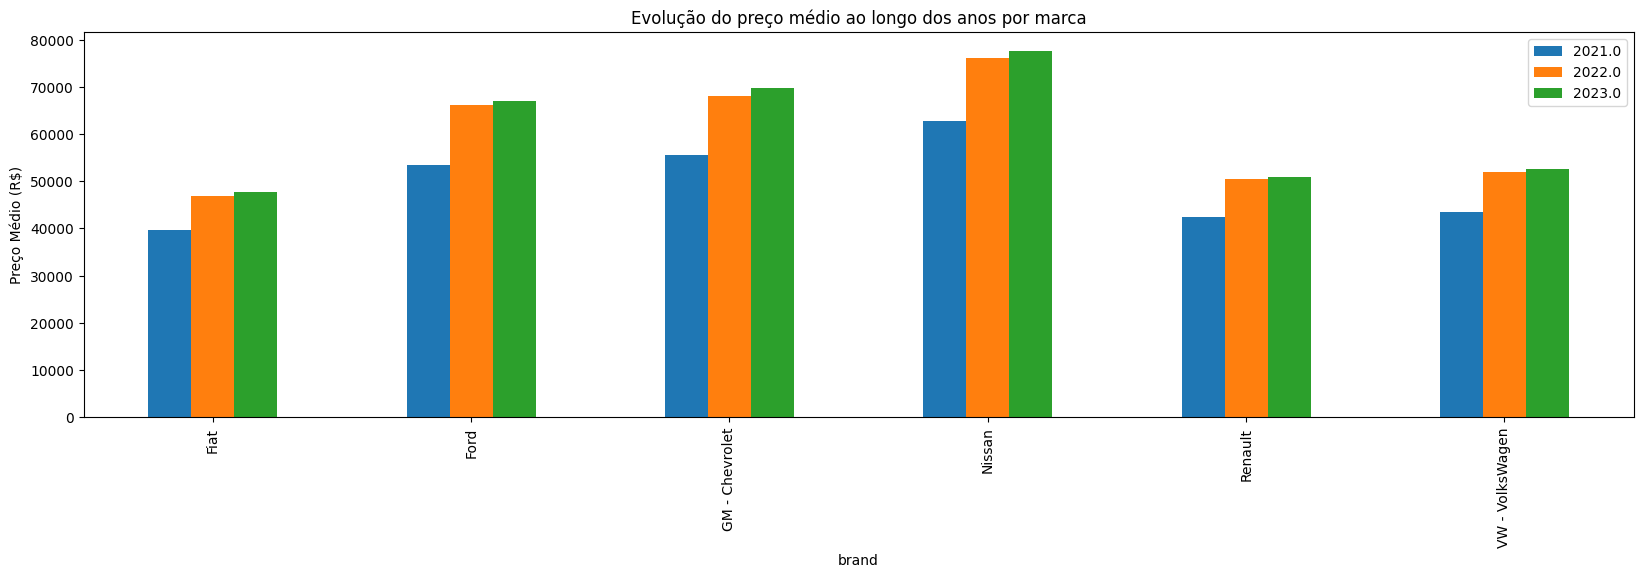

In [44]:
df_brand['avg_price_brl'].plot(kind='bar', figsize=(20,5), title = 'Evolução do preço médio ao longo dos anos por marca')
plt.legend(loc='upper right')
plt.ylabel('Preço Médio (R$)')

Ford e GM apresentaram a maior alta de preços no perído em análise (26%). Renault apresentou a menor alta de preços (20%).

# Análise temporal do preço por tipo de combustível

In [45]:
#Função de agregação para avaliar a variação dos preços ao longo dos anos da Tabela FIPE com relação ao tipo de combustível

df_fuel = df[['fuel','avg_price_brl', 'year_of_reference']].groupby(['fuel','year_of_reference']).mean('avg_price_brl').unstack()
df_fuel['Variação  (2021-2023)'] = ((df_fuel['avg_price_brl'][2023]-df_fuel['avg_price_brl'][2021])/df_fuel['avg_price_brl'][2021]).round(2)
df_fuel.sort_values(by='Variação  (2021-2023)', ascending = False)


avg_price_brl                                \
year_of_reference        2021.0         2022.0         2023.0   
fuel                                                            
Diesel             87937.893271  112427.043723  114572.408000   
Alcohol            11683.636418   13797.962040   14171.588652   
Gasoline           41228.962419   48329.901778   49044.779291   

                  Variação  (2021-2023)  
year_of_reference                        
fuel                                     
Diesel                             0.30  
Alcohol                            0.21  
Gasoline                           0.19

Text(0, 0.5, 'Preço Médio (R$)')

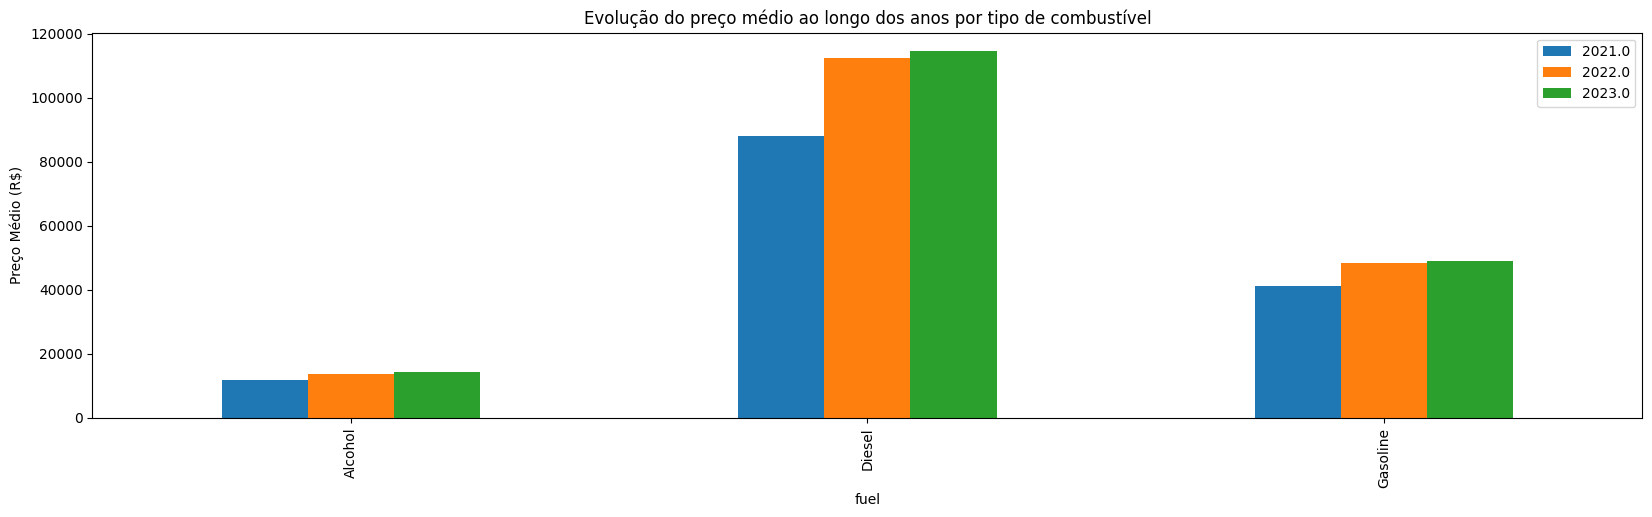

In [46]:
df_fuel['avg_price_brl'].plot(kind='bar', figsize=(20,5), title = 'Evolução do preço médio ao longo dos anos por tipo de combustível')
plt.legend(loc='upper right')
plt.ylabel('Preço Médio (R$)')

Carros à diesel tiveram o maior aumento nos preços ao longo dos anos (30%) e carros à gasolina tiveram a menor alta (19%).

# Quantidade de carros por ano de fabricação e tipo de combustível

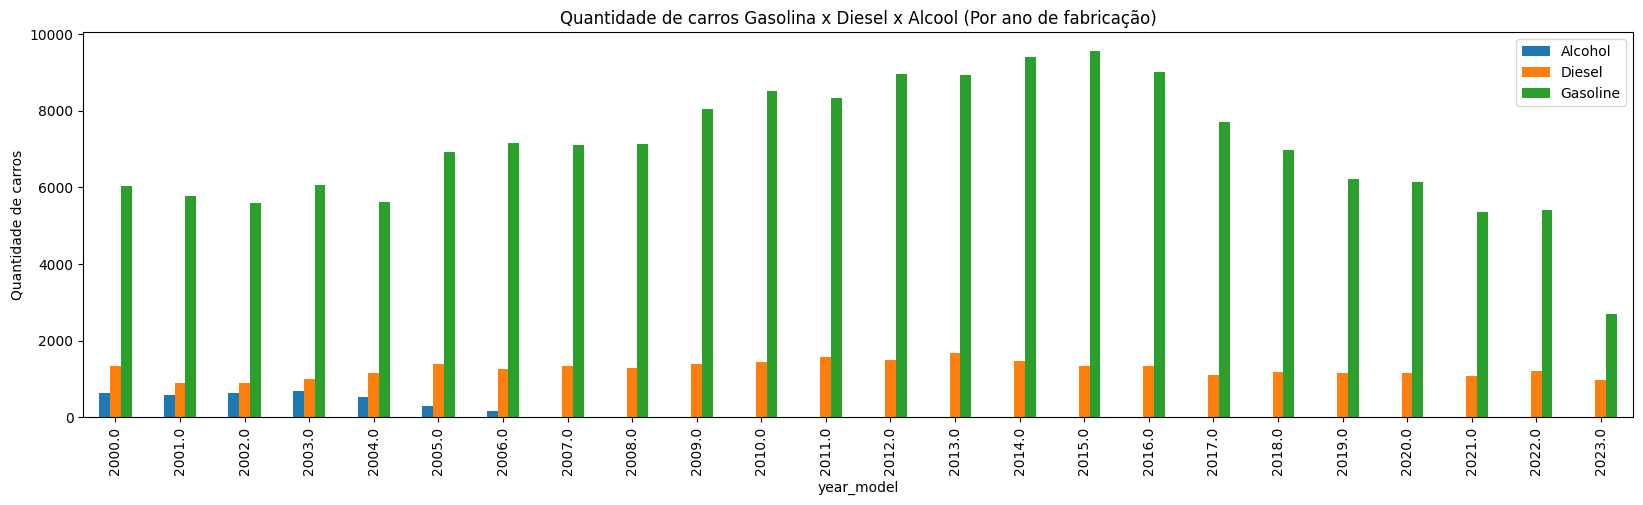

In [47]:
#Função de agregação para avaliar a quantidade de carros por tipo de combustível e por ano de fabricação
df[['year_model','fuel','avg_price_brl']].groupby(['year_model','fuel']).count().unstack().plot(kind='bar', figsize=(20,5), title='Quantidade de carros Gasolina x Diesel x Alcool (Por ano de fabricação)')
plt.ylabel('Quantidade de carros')
plt.legend(['Alcohol','Diesel','Gasoline'])

- Não foram listados carros a alcool fabricados a partir de 2006.
- Quantidade de carros à Gasolina em redução a partir de 2015.

# Quantidade de carros por ano de fabricação e tipo de Transmissão

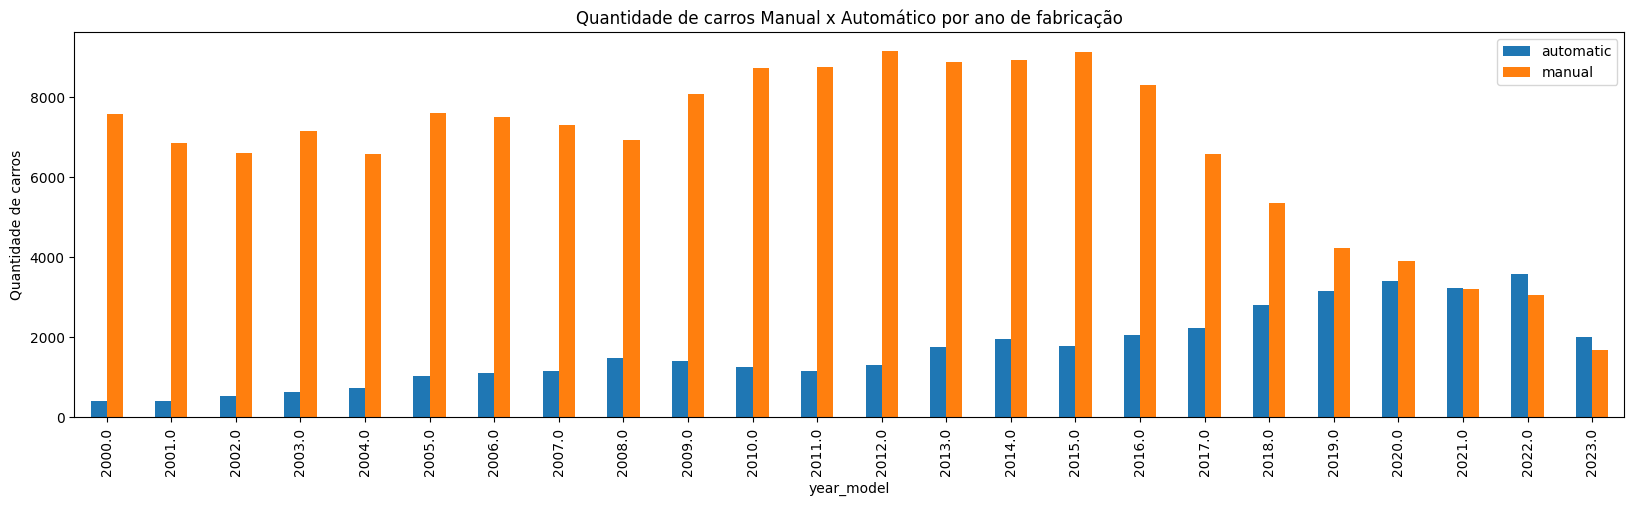

In [48]:
#Função de agregação para avaliar a quantidade de carros por tipo de transmissão e por ano de fabricação
df[['year_model','gear','authentication']].groupby(['year_model','gear']).count().unstack().plot(kind='bar', figsize=(20,5), title='Quantidade de carros Manual x Automático por ano de fabricação', label=['automatic','manual'], legend=False)
plt.ylabel('Quantidade de carros')
plt.legend(['automatic','manual'])

- Aumento no número de carros automáticos ao longo dos diferentes anos de fabricação.
- A partir de 2021 já existiam mais carros automáticos listados do que carros manuais

# Análise temporal do preço por tipo de transmissão

In [49]:
#Função de agregação para avaliar a variação do preço dos carros manuais e automáticos nas tabelas FIPE de 2021,2022 e 2023

df_gear = df[['gear','avg_price_brl', 'year_of_reference']].groupby(['gear','year_of_reference']).mean('avg_price_brl').unstack()
df_gear['Variação '] = ((df_gear['avg_price_brl'][2023]-df_gear['avg_price_brl'][2021])/df_gear['avg_price_brl'][2021]).round(2)
df_gear.sort_values(by='Variação ', ascending = False)


avg_price_brl                             Variação 
year_of_reference        2021.0        2022.0        2023.0          
gear                                                                 
manual             41129.769654  49394.834204  50219.819368      0.22
automatic          73884.774935  88884.880775  89758.728127      0.21

Text(0, 0.5, 'Preço Médio (R$)')

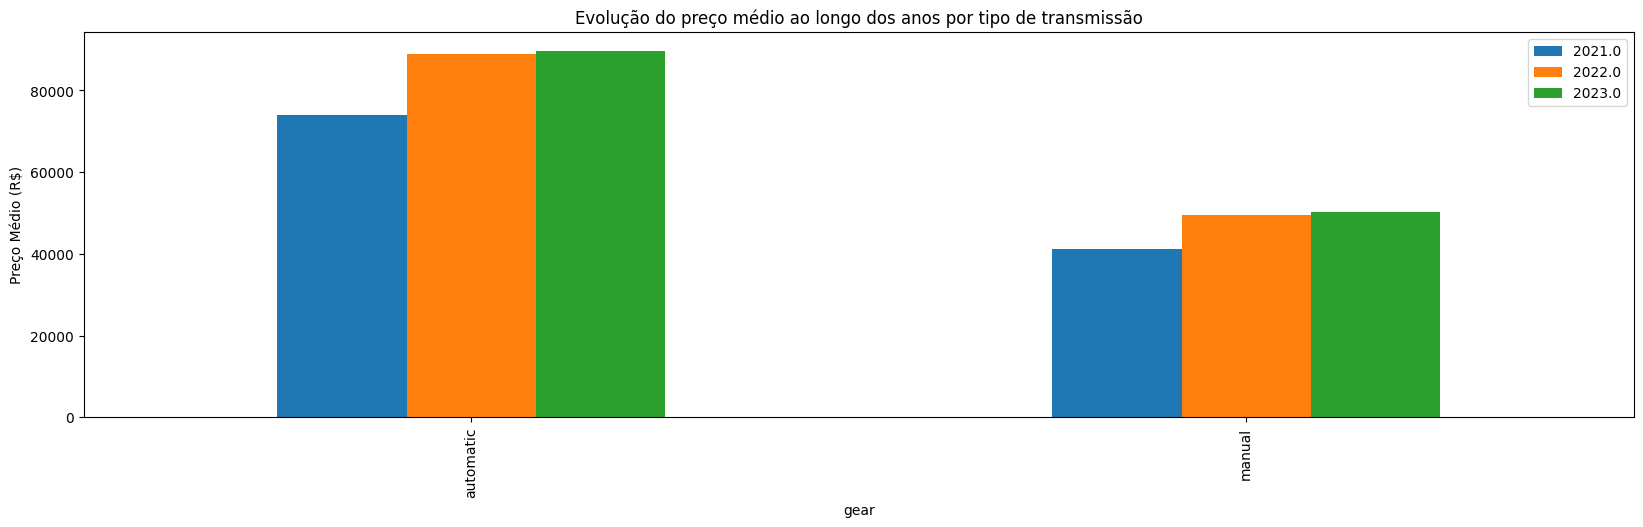

In [50]:
df_gear['avg_price_brl'].plot(kind='bar', figsize=(20,5), title = 'Evolução do preço médio ao longo dos anos por tipo de transmissão')
plt.legend(loc='upper right')
plt.ylabel('Preço Médio (R$)')

Variação de preço semelhante entre carros automáticos (21%) e manuais (22%) ao longo dos anos em análise.

# Análise temporal do preço por ano de fabricação e marca (Tabela do Ano de referência 2023)

In [51]:
#Evolução dos preço ao longo dos anos de fabricação por marca
df_year_model_2023= df[df['year_of_reference']==2023][['year_model','brand','avg_price_brl']].groupby(['year_model','brand']).mean('avg_price_brl').unstack()
df_year_model_2023.head()

avg_price_brl                                             \
brand               Fiat          Ford GM - Chevrolet        Nissan   
year_model                                                            
2000.0      13666.661972  29120.954545   30379.636364  22519.875000   
2001.0      15070.769231  32561.261538   25745.900000  29485.166667   
2002.0      16606.169492  30484.849057   28150.327586  37825.000000   
2003.0      17100.121622  29113.781818   27974.704545  48765.000000   
2004.0      19821.362069  36398.705882   31973.055556  62714.600000   

                                          
brand            Renault VW - VolksWagen  
year_model                                
2000.0      10040.500000    17738.836066  
2001.0      10892.179487    17665.367647  
2002.0      13727.277778    18317.430556  
2003.0      16025.372093    19637.528736  
2004.0      17811.488889    21449.486486

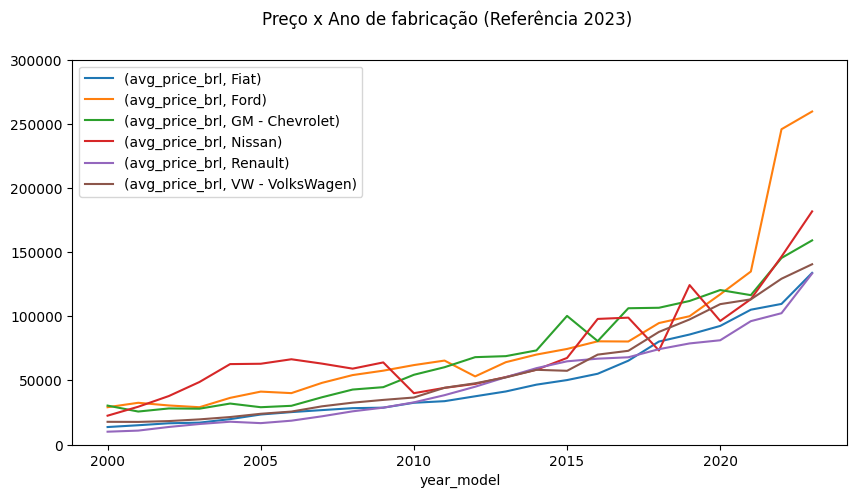

In [52]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
x = 0
for i in df_year_model_2023.columns:
  df_year_model_2023[i].plot(ylim=(0,300000))


plt.suptitle('Preço x Ano de fabricação (Referência 2023)')
plt.legend()


Foi observado um grande aumento no preço médio dos carros da marca Ford fabricados a partir de 2020.
Fiat e Renault apresentam uma desvalorização mais estável do preço médio ao longo dos anos.

# 5 modelos mais caros e mais baratos de cada Marca

In [53]:
#Lista dos 5 carros mais caros e mais baratos de cada marca
for i in df['brand'].unique():
  print(f'{i} - 5 Modelos mais caros')
  print(df[df['brand']==i][['model','year_model','avg_price_brl']].sort_values(by='avg_price_brl', ascending=False).head(), end='\n\n')

  print(f'{i} - 5 Modelos mais baratos',end='\n')
  print(df[df['brand']==i][['model','year_model','avg_price_brl']].sort_values(by='avg_price_brl', ascending=False).tail(), end='\n\n\n')



GM - Chevrolet - 5 Modelos mais caros
                                        model  year_model  avg_price_brl
153247  Corvette 5.7/ 6.0, 6.2 Conv./Stingray      2015.0       802804.0
145096  Corvette 5.7/ 6.0, 6.2 Conv./Stingray      2015.0       775657.0
161398  Corvette 5.7/ 6.0, 6.2 Conv./Stingray      2015.0       775452.0
169587  Corvette 5.7/ 6.0, 6.2 Conv./Stingray      2015.0       771852.0
185984  Corvette 5.7/ 6.0, 6.2 Conv./Stingray      2015.0       769200.0

GM - Chevrolet - 5 Modelos mais baratos
                                      model  year_model  avg_price_brl
48034  Corsa Furgão 1.6 MPFi Powertech 92cv      2000.0         8000.0
8169   Corsa Furgão 1.6 MPFi Powertech 92cv      2000.0         7991.0
16103  Corsa Furgão 1.6 MPFi Powertech 92cv      2000.0         7970.0
24055  Corsa Furgão 1.6 MPFi Powertech 92cv      2000.0         7949.0
32024  Corsa Furgão 1.6 MPFi Powertech 92cv      2000.0         7928.0


Fiat - 5 Modelos mais caros
                           

# Conclusões Finais

- Nissan é a marca com maior preço médio e Fiat é a marca com o menor preço médio além de ser a mais comum

- Carros à gasolina são os mais comuns enquanto que os à Diesel são mais caros (124% mais caros em relação ao preço médio). Para os carros à Diesel, Volkswagen apresenta o maior preço médio e Ford o menor preço médio. Para os carros à Gasolina, Nissan apresenta os maiores preços médios e o Renault os menores.

- Carros manuais são os mais comuns enquanto que os automáticos são mais caros(80% mais caros em relação ao preço médio). Para os carros automáticos, Volkswagen apresenta o maior preço médio e Ford o menor preço. Para os carros manuais Nissan apresenta o maior preço médio e Fiat o menor.

- Os preços apresentaram altas constantes no ano de 2021 e se mantiveram estáveis em 2022 e 2023. Ford apresentou o maior aumento nos preços (26%) e Renault apresentou o menor aumento (20%) no período entre 2021 e 2023. Carros a Diesel apresentaram o maior aumento de Preço (30%) e carros à Gasolina o menor aumento (19%)

A maior estabilidade nos preços em 2022 e 2023 pode impulsionar a compra de carros usados.

O aumento de 30% no preço médio dos carros a Diesel pode diminuir a procura por esses modelos.

A quantidade de carros automáticos listados nas tabelas FIPE aumentou com o passar dos anos e a partir de 2021 ultrapassou a quantidade de carros manuais.



